In [1]:
import pandas as pd
import duckdb

In [3]:
salaries =pd.read_csv('salaries.csv')
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


  ### a) Start with some simple EDA, check summary statistics, info, columns etc

In [4]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [28]:
duckdb.sql('DESC salaries;').df()

,column_name,column_type,null,key,default,extra
0,work_year,BIGINT,YES,None,None,None
1,experience_level,VARCHAR,YES,None,None,None
2,employment_type,VARCHAR,YES,None,None,None
3,job_title,VARCHAR,YES,None,None,None
4,salary,BIGINT,YES,None,None,None
5,salary_currency,VARCHAR,YES,None,None,None
6,salary_in_usd,BIGINT,YES,None,None,None
7,employee_residence,VARCHAR,YES,None,None,None
8,remote_ratio,BIGINT,YES,None,None,None
9,company_location,VARCHAR,YES,None,None,None


In [6]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


In [12]:
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,151445.000000,1.514450e+05,151445.000000,151445.000000
mean,2024.435313,1.628380e+05,157527.458411,20.938625
std,0.671842,2.080124e+05,74150.772377,40.620393
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105800.000000,0.000000
50%,2025.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [18]:
salaries['employee_residence'].sort_values().unique()

array(['AD', 'AE', 'AM', 'AR', 'AS', 'AT', 'AU', 'BA', 'BE', 'BG', 'BM',
       'BO', 'BR', 'CA', 'CD', 'CF', 'CH', 'CL', 'CN', 'CO', 'CR', 'CY',
       'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR',
       'GB', 'GE', 'GH', 'GR', 'GT', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE',
       'IL', 'IN', 'IQ', 'IR', 'IT', 'JE', 'JM', 'JO', 'JP', 'KE', 'KR',
       'KW', 'LB', 'LS', 'LT', 'LU', 'LV', 'MD', 'MK', 'ML', 'MT', 'MU',
       'MX', 'MY', 'NG', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PK',
       'PL', 'PR', 'PT', 'QA', 'RO', 'RS', 'RU', 'RW', 'SA', 'SE', 'SG',
       'SI', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'UA', 'UG', 'US', 'UZ',
       'VE', 'VN', 'XK', 'ZA', 'ZM'], dtype=object)

In [19]:
salaries['salary_currency'].sort_values().unique()

array(['AUD', 'BRL', 'CAD', 'CHF', 'CLP', 'CZK', 'DKK', 'EUR', 'GBP',
       'HKD', 'HUF', 'ILS', 'INR', 'JPY', 'MXN', 'NOK', 'NZD', 'PHP',
       'PLN', 'SEK', 'SGD', 'THB', 'TRY', 'TWD', 'USD', 'ZAR'],
      dtype=object)

In [27]:
duckdb.sql('SELECT DISTINCT salary_currency FROM salaries').df()

,salary_currency
0,AUD
1,PLN
2,ZAR
3,DKK
4,GBP
5,HKD
6,SGD
7,INR
8,PHP
9,SEK


###   b) Plot the distribution of the salaries in USD.

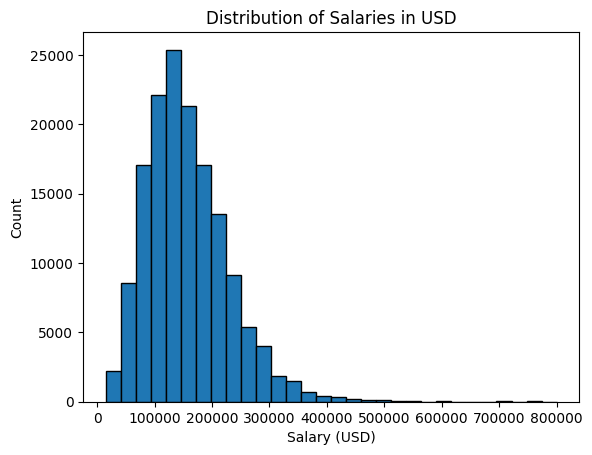

In [52]:
import matplotlib.pyplot as plt

usd_salary = salaries['salary_in_usd']

plt.hist(usd_salary, bins=30, edgecolor='black')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')
plt.title('Distribution of Salaries in USD')
plt.show()
